# Import các thư viện cần thiết

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

# Tạo dữ liệu

In [34]:
x1 = [50, 48, 13, 32, 20, 29, 15, 56, 54, 32, 32, 27, 18, 32, 52, 50, 53, 15, 30, 30, 52, 20]
x2 = [8, 7, 2, 9, 5, 7, 4, 7, 9, 6, 4, 4, 2, 4, 7, 6, 8, 3, 5, 4, 6, 3]
x1 = np.array(x1)
x2 = np.array(x2)
X=[]
for i in range(len(x1)):
  point=([[i],x2[i]])
  X.append(point)

# Lưu lại thành mảng các data point
X = np.array([x1,x2]).T

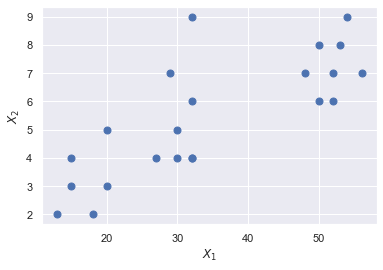

In [36]:
# Vẽ các data point 
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=7)
plt.plot()
plt.show()

Thử quan sát bằng mắt, ta có thể phân dữ liệu thành 3 cụm, liệu rằng máy có thể phân đúng như ta mong muốn.

# Ta sẽ xây dựng K-means trên Numpy

In [37]:
# Hàm random n_cluster (số cụm K mong muốn)
def kmeans_init_centers(X, n_cluster):

  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [38]:
# Hàm dự đoán data point sẽ thuộc cluster nào
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

In [39]:
# Hàm update lại centers sau khi đã phân cụm
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers


In [40]:
# Hàm khảo sát k-means đã hội tụ chưa. Tức là center update vẫn bằng center trước
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))


In [41]:
# Hàm biểu diễn từng bước học của K-means
# Dễ hiểu hơn vì mình viết hàm vẽ ra quá trình làm việc của k-means đó!
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  #Tạo list màu (ở đây mình tạo 3 màu) vì K=3 !! Có thể tạo nhiều hơn nhé
  plt_colors = ['b', 'g', 'r']
  for i in range(n_cluster):
    data = X[labels == i]
    # Biểu diễn ra, mình dùng hình ngôi sao để biểu diễn center, dùng hình tròn để biểu diễn datapoint. Cùng cụm sẽ cùng màu
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + 'o', markersize = 5, label = 'cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i] + '*', markersize = 15, label = 'center_' + str(i))
  #plt.legend()
  plt.show()


In [42]:
# Hàm xây dựng thuật toán K-means
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Phân nhãn cho dữ liệu lần  ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center lần ' + str(times + 1))
    times += 1 # Biến times của mình để xem việc update center xảy ra mấy lần
  return (centers, labels, times)

[[32  4]
 [54  9]
 [32  9]]


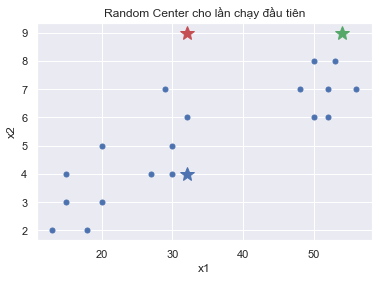

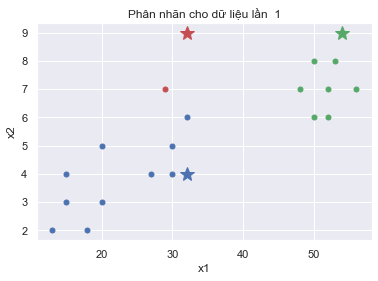

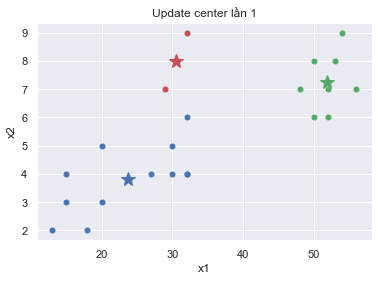

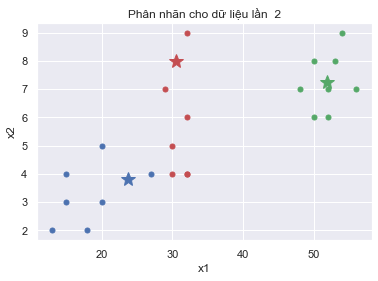

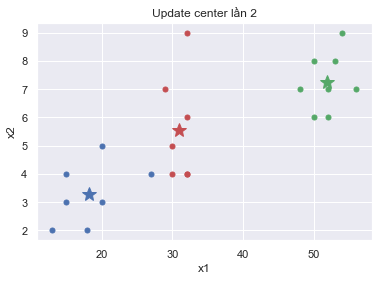

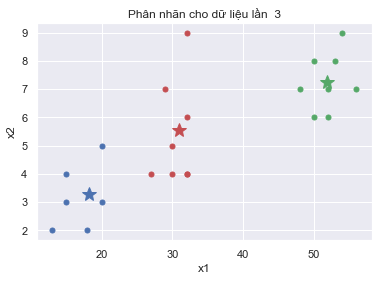

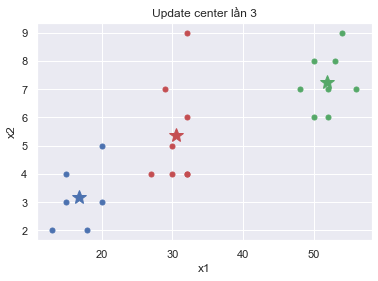

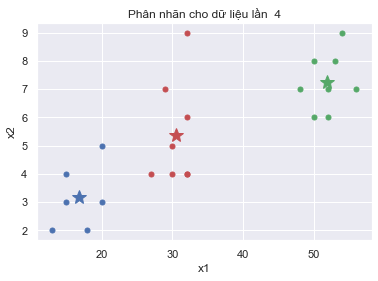

Done! Kmeans đã phân cụm hoàn tất sau 4 bước nhảy.


In [43]:
# Biểu diễn kết quả:
# Output cuối cùng phụ thuộc vào random center ban đầu , nên tại đây bạn Run nhiều lần sẽ cho ra nhiều kết quả khác nhau nhé

n_cluster =3 # Như mong muốn thì mình sẽ cần n_cluster = 3 tức K=3
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers)

init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Random Center cho lần chạy đầu tiên')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

# Print và xem "con máy" mình học tốt không nào
print('Done! Kmeans đã phân cụm hoàn tất sau', times+1, 'bước nhảy.')

# Giờ thử xử dụng thư viện sklearn nhé

In [44]:
# Tạo ra 3 center tuỳ thích nhé:
# Có thể xử dụng hàm random những thôi tạo tay cho tiện :v
center_x = [15,30, 45]
center_y = [5 ,6, 7]

In [45]:
# Train K-means với dữ liệu đã có
kmeans = KMeans(n_clusters = 3,
                n_jobs = -1,
                random_state = 123).fit(X)


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [49]:
labels = kmeans.labels_
labels

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1])

Xong rồi đấy: chỉ với 2 dòng code thì sklearn đã cho kết quả. Giờ thì show nó ra thử xem sao thôi

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


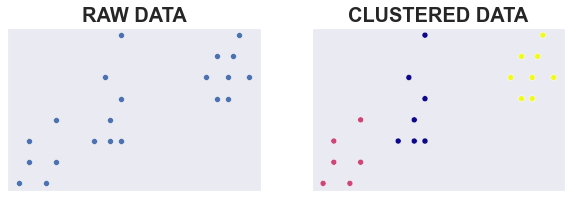

In [51]:
#Bước này thì vẽ ra xem kết quả thôi
fig, axes = plt.subplots(1, 2, figsize=(10,3))
title = ["Raw Data", "Clustered Data"]
#Vẽ ra dữ liệu ban đầu
idx, ax = 0, axes[0]
sns.scatterplot(x1, x2, ax = ax)
ax.set_title(title[idx].upper(), fontsize = 20, fontweight = "bold")
ax.set_xticks([])
ax.set_yticks([])
#Dữ liệu sau khi phân cụm
idx, ax = 1, axes[1]
sns.scatterplot(x1, x2, labels , ax = ax, palette="plasma")
ax.set_title(title[idx].upper(), fontsize = 20, fontweight = "bold")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.get_legend().remove()

Tuyệt vời!!
- Phân cụm bằng thư viện cho chính xác tối ưu thuật toán K-means
- Xây dựng trên Numpy thì phụ thuộc vào random ban đầu, nếu random center tốt thì vẫn cho kết quả khớp với thư viện sklearn
- Giờ thì xem xem nó có phù hợp với việc bạn phân cụm bằng mắt ở đồ thị data ban đầu kh nhé!